In [1]:
import tensorflow as tf
import numpy as np

/Users/leo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 1. Linear

In [2]:
# create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

# create tf structure start
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # range from -1 to 1
biases = tf.Variable(tf.zeros([1]))

y = Weights * x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
# create tf structure end

## method 1

In [3]:
sess = tf.Session()
sess.run(init)

for step in range(201):
    sess.run(train)
    
    if step % 20 == 0:
        print(step, sess.run(Weights), sess.run(biases))
        
sess.close()

0 [0.1946479] [0.35950148]
20 [0.11083212] [0.29370338]
40 [0.10261377] [0.29848066]
60 [0.1006307] [0.29963338]
80 [0.10015219] [0.29991156]
100 [0.10003673] [0.29997867]
120 [0.10000888] [0.29999486]
140 [0.10000215] [0.29999876]
160 [0.10000051] [0.2999997]
180 [0.10000014] [0.29999992]
200 [0.10000009] [0.29999995]


## method 2

In [4]:
with tf.Session() as sess2:
    sess2.run(init)
    
    for step in range(201):
        sess2.run(train)
    
        if step % 20 == 0:
            print(step, sess2.run(Weights), sess2.run(biases))

0 [-0.00175577] [0.531934]
20 [0.05733233] [0.32480234]
40 [0.08970447] [0.3059847]
60 [0.09751575] [0.30144408]
80 [0.09940057] [0.30034846]
100 [0.09985536] [0.30008408]
120 [0.09996512] [0.30002028]
140 [0.0999916] [0.3000049]
160 [0.09999797] [0.3000012]
180 [0.09999952] [0.3000003]
200 [0.0999999] [0.30000007]


# 2. Non-Linear

## Add layer function

In [5]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases  = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if activation_function:
        outputs = activation_function(Wx_plus_b)
    else:
        outputs = Wx_plus_b
    return outputs

In [6]:
#?np.linspace()

In [7]:
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise  = np.random.normal(0, 0.05, x_data.shape) # normal distribution
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1.0])
ys = tf.placeholder(tf.float32, [None, 1.0])

In [8]:
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

In [9]:
sess = tf.Session()
sess.run(init)

for i in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys:y_data})
    if i % 100 == 0:
        print(sess.run(loss, feed_dict={xs: x_data, ys:y_data}))

0.19601227
0.0049264054
0.0038338378
0.003587401
0.0034613148
0.0033767691
0.0033163168
0.0032671583
0.0032304737
0.0032023136


# Visualisation

In [38]:
import matplotlib.pyplot as plt
from IPython import display

%matplotlib inline

In [57]:
#plt.figure()

#plt.scatter(x_data, y_data)

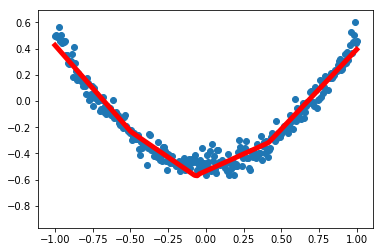

In [61]:
import time
# plot in a separate window

sess = tf.Session()
sess.run(init)

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion() # for dynamicly update plot, plt.show(block=False) in old version

for i in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys:y_data})
    if i % 100 == 0:
        #print(sess.run(loss, feed_dict={xs: x_data, ys:y_data}))
        try:
            #ax.lines.remove(lines[0]) # remove last line
            ax.lines.pop()
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        #plt.pause(0.1)